In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [26]:
x_train.shape

(60000, 28, 28)

In [5]:
X_train = np.reshape( x_train, (60000,28*28) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

In [6]:
X_train.shape

(60000, 784)

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
y_train = (y_train%2 == 0).astype(int)
y_test = (y_test%2 == 0).astype(int)

In [19]:
dimension_entrada = X_train.shape[1]
dimension_salida = 1
modelo = Sequential()
modelo.add(Dense(20, input_dim=dimension_entrada,activation="relu"))
dimension_entrada = X_train.shape[1]
dimension_salida = 1
modelo = Sequential()
modelo.add(Dense(20, input_dim=dimension_entrada, activation="relu"))
#modelo.add(Input(shape=dimension_entrada))
#modelo.add(Dense(20, activation="relu"))
modelo.add(Dense(1, activation= "sigmoid"))
sgd = SGD(learning_rate=0.1)
modelo.compile(loss="binary_crossentropy",optimizer=sgd,metrics=["accuracy"])
modelo.summary()



c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,721 (61.41 KB)

 Trainable params: 15,721 (61.41 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
epochs = 10
batch_size = 20
historia = modelo.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 769us/step - accuracy: 0.9185 - loss: 0.2071
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - accuracy: 0.9712 - loss: 0.0819
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - accuracy: 0.9767 - loss: 0.0646
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - accuracy: 0.9794 - loss: 0.0570
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - accuracy: 0.9817 - loss: 0.0522
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - accuracy: 0.9846 - loss: 0.0445
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - accuracy: 0.9854 - loss: 0.0425
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - accuracy: 0.9862 - loss: 0.0381
Epoch 9/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 764us/step - accuracy: 0.9866 - loss: 0.0373
Epoch 10/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.9872 - loss: 0.0355


In [22]:
y_pred = modelo(X_test[0:10])
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[2.5458779e-05],
       [8.7138224e-01],
       [2.8486755e-03],
       [9.9774915e-01],
       [9.9209732e-01],
       [5.2348542e-04],
       [9.9974269e-01],
       [1.7323367e-04],
       [9.9779594e-01],
       [2.3621855e-05]], dtype=float32)>

In [23]:
y_test[0:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

<Axes: >

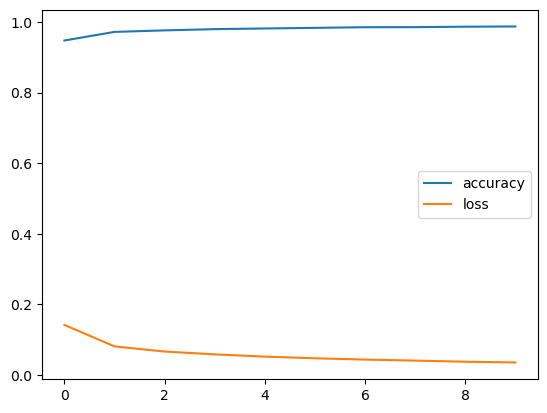

In [21]:
pd.DataFrame(historia.history).plot()